In [60]:
import matplotlib as plt
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import pandas as pd
%matplotlib inline
from sklearn import datasets,linear_model,metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

data = pd.read_csv('house.csv', usecols=['price','bedrooms','sqft_living'])
data.head(5)

,price,bedrooms,sqft_living
0,221900.0,3,1180
1,538000.0,3,2570
2,180000.0,2,770
3,604000.0,4,1960
4,510000.0,3,1680


In [61]:
data = (data-data.mean())/data.std()
data.head()

,price,bedrooms,sqft_living
0,-0.866697,-0.398728,-0.979812
1,-0.005688,-0.398728,0.533622
2,-0.980827,-1.473925,-1.426221
3,0.174086,0.676469,-0.130547
4,-0.081956,-0.398728,-0.435412


In [62]:
X = data.iloc[:,1:3] #setting matrices
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
X[0:5]
                
                

array([[ 1.        , -0.39872792, -0.97981235],
       [ 1.        , -0.39872792,  0.53362199],
       [ 1.        , -1.47392526, -1.42622105],
       [ 1.        ,  0.67646941, -0.13054704],
       [ 1.        , -0.39872792, -0.43541151]])

In [63]:
y = data.iloc[:,0:1].values
y[0:5]

array([[-0.86669728],
       [-0.00568779],
       [-0.98082666],
       [ 0.17408642],
       [-0.08195563]])

In [64]:
theta = np.zeros([1,3])
theta

array([[0., 0., 0.]])

In [85]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X@theta.T)-y),2)
    return np.sum(tobesummed)/(2*len(X))


def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X@theta.T-y),axis=0)
        cost[i] = computeCost(X,y,theta)
    
    return theta,cost







In [103]:
alpha = 0.01
iters = 1000

In [108]:
tempcost = computeCost(X,y,theta)
print(tempcost)

0.49997686577522815


In [106]:
g,Cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

[[-1.91905386e-16 -1.37884725e-01  7.78718940e-01]]


In [102]:
finalcost = computeCost(X,y,g)
print(finalcost)

0.2465869481341029


Text(0, 0.5, 'error')

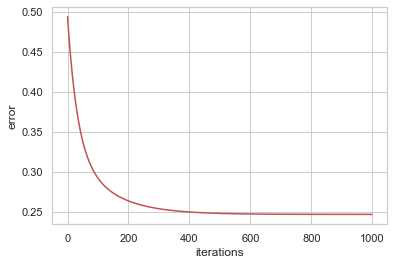

In [116]:
fig,ax=plt.subplots()
ax.plot(np.arange(iters),Cost,'r')
ax.set_xlabel('iterations')
ax.set_ylabel('error')